<a href="https://colab.research.google.com/github/manojkumarshenu/Encryptix-/blob/main/Movie_Genre_classification(task1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
train_data = pd.read_csv('/content/drive/MyDrive/almabetter 1/Task1/train_data.txt', sep =':::', names=['Title','Genre','Description'])
train_data.head()
test_data = pd.read_csv('/content/drive/MyDrive/almabetter 1/Task1/test_data.txt', sep =':::', names = ['id','Title','Description'])
test_data.head()

<ipython-input-2-39e04eb7451e>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv('/content/drive/MyDrive/almabetter 1/Task1/train_data.txt', sep =':::', names=['Title','Genre','Description'])
<ipython-input-2-39e04eb7451e>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv('/content/drive/MyDrive/almabetter 1/Task1/test_data.txt', sep =':::', names = ['id','Title','Description'])


,id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [ ]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [ ]:
test_data.describe()

,id
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [ ]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [ ]:
class_distribution = train_data['Genre'].value_counts()
print('Class Distribuiton')
print(class_distribution)

Class Distribuiton
Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64


In [ ]:
imbalance_ratio = class_distribution.min()/class_distribution.max()
print("Imbalance ration :", imbalance_ratio)

Imbalance ration : 0.009696613531183427


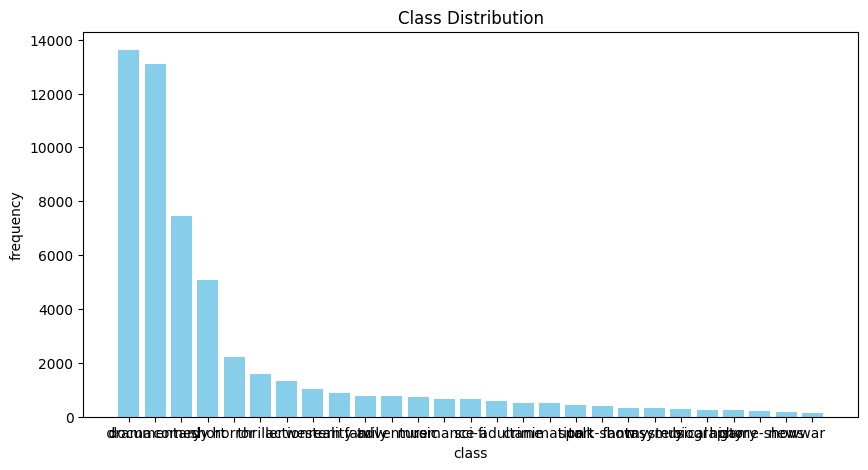

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
plt.bar(x=class_distribution.index,height=class_distribution.values, color='skyblue')
plt.title('Class Distribution')
plt.xlabel('class')
plt.ylabel('frequency')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
Tf_idf = TfidfVectorizer(max_features=5000)
x_train_tf_idf = Tf_idf.fit_transform(train_data['Description'])
y_train = train_data['Genre']


model = MultinomialNB()
model.fit(x_train_tf_idf, y_train)
x_train_pred = model.predict(x_train_tf_idf)
print(x_train_pred)
print("Accuracy_score:", accuracy_score(y_train, x_train_pred))

print("Classification Report on training set:\n", classification_report(y_train, x_train_pred))

[' drama ' ' drama ' ' drama ' ... ' comedy ' ' comedy ' ' documentary ']
Accuracy_score: 0.5359132327443096


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report on training set:
                precision    recall  f1-score   support

      action        0.70      0.09      0.16      1315
       adult        0.79      0.05      0.10       590
   adventure        0.76      0.05      0.10       775
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       265
      comedy        0.56      0.45      0.50      7447
       crime        0.00      0.00      0.00       505
 documentary        0.57      0.90      0.70     13096
       drama        0.47      0.84      0.60     13613
      family        1.00      0.00      0.01       784
     fantasy        0.00      0.00      0.00       323
   game-show        1.00      0.14      0.24       194
     history        0.00      0.00      0.00       243
      horror        0.78      0.36      0.50      2204
       music        0.90      0.16      0.27       731
     musical        0.00      0.00      0.00       277
     mystery        0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
x_test_ifidf = tfidf.fit_transform(test_data['Description'])
x_test_pred = model.predict(x_test_ifidf)
print(x_test_pred)
test_data['Predicted_Genre'] = x_test_pred

[' drama ' ' drama ' ' documentary ' ... ' documentary ' ' drama '
 ' short ']


In [ ]:
test_data.to_csv('predicted_genres.csv', index=False)

print(test_data)

          id                             Title  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             Description Predicted_Genre  
0       L.R. Brane loves his life - his car, his apar...          drama   
1       Spain, March 1964: Quico is a very naughty ch...          drama   
2       One year in the life of Albin and his family ...    documentary   
3       His father has died, he hasn't spoken with hi...    documentary   
4       Before he was kn